In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0139-0001.jpeg
pneumonia picture title: person136_bacteria_654.jpeg


Text(0.5, 1.0, 'Pneumonia')

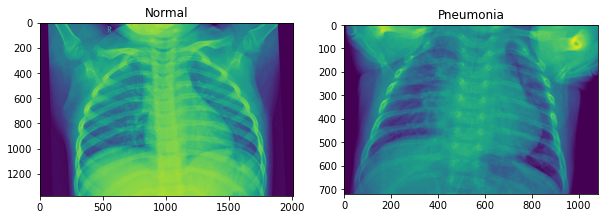

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [9]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 150)

Epoch 1/150
163/163 [==============================] - 85s 522ms/step - loss: 0.4454 - tp: 4177.0000 - fp: 1077.0000 - tn: 4139.0000 - fn: 1039.0000 - accuracy: 0.7972 - precision: 0.7950 - recall: 0.8008 - auc: 0.8733 - val_loss: 0.6299 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7441
Epoch 2/150
163/163 [==============================] - 84s 518ms/step - loss: 0.3129 - tp: 4511.0000 - fp: 714.0000 - tn: 4502.0000 - fn: 705.0000 - accuracy: 0.8640 - precision: 0.8633 - recall: 0.8648 - auc: 0.9395 - val_loss: 0.5581 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8438
Epoch 3/150
163/163 [==============================] - 86s 531ms/step - loss: 0.2782 - tp: 4586.0000 - fp: 623.0000 - tn: 4593.0000 - fn: 630.0000 - accuracy: 0.8799 - precision: 0.8804 - recall: 0.8792 - a

Epoch 22/150
163/163 [==============================] - 85s 523ms/step - loss: 0.1562 - tp: 4877.0000 - fp: 337.0000 - tn: 4879.0000 - fn: 339.0000 - accuracy: 0.9352 - precision: 0.9354 - recall: 0.9350 - auc: 0.9847 - val_loss: 0.5330 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8281
Epoch 23/150
163/163 [==============================] - 85s 520ms/step - loss: 0.1489 - tp: 4912.0000 - fp: 301.0000 - tn: 4915.0000 - fn: 304.0000 - accuracy: 0.9420 - precision: 0.9423 - recall: 0.9417 - auc: 0.9859 - val_loss: 0.6093 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7812
Epoch 24/150
163/163 [==============================] - 99s 607ms/step - loss: 0.1492 - tp: 4913.0000 - fp: 299.0000 - tn: 4917.0000 - fn: 303.0000 - accuracy: 0.9423 - precision: 0.9426 - recall: 0.9419 - 

Epoch 43/150
163/163 [==============================] - 52s 316ms/step - loss: 0.1338 - tp: 4937.0000 - fp: 275.0000 - tn: 4941.0000 - fn: 279.0000 - accuracy: 0.9469 - precision: 0.9472 - recall: 0.9465 - auc: 0.9888 - val_loss: 0.3322 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9492
Epoch 44/150
163/163 [==============================] - 52s 317ms/step - loss: 0.1262 - tp: 4957.0000 - fp: 256.0000 - tn: 4960.0000 - fn: 259.0000 - accuracy: 0.9506 - precision: 0.9509 - recall: 0.9503 - auc: 0.9901 - val_loss: 0.3024 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9688
Epoch 45/150
163/163 [==============================] - 53s 327ms/step - loss: 0.1224 - tp: 4964.0000 - fp: 236.0000 - tn: 4980.0000 - fn: 252.0000 - accuracy: 0.9532 - precision: 0.9546 - recall: 0.9517 - 

Epoch 64/150
163/163 [==============================] - 51s 313ms/step - loss: 0.1149 - tp: 5004.0000 - fp: 211.0000 - tn: 5005.0000 - fn: 212.0000 - accuracy: 0.9595 - precision: 0.9595 - recall: 0.9594 - auc: 0.9915 - val_loss: 0.4374 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.8418
Epoch 65/150
163/163 [==============================] - 51s 312ms/step - loss: 0.1154 - tp: 4972.0000 - fp: 230.0000 - tn: 4986.0000 - fn: 244.0000 - accuracy: 0.9546 - precision: 0.9558 - recall: 0.9532 - auc: 0.9911 - val_loss: 0.3349 - val_tp: 266.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 38.0000 - val_accuracy: 0.9062 - val_precision: 0.9333 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 66/150
163/163 [==============================] - 51s 313ms/step - loss: 0.1077 - tp: 4995.0000 - fp: 225.0000 - tn: 4991.0000 - fn: 221.0000 - accuracy: 0.9572 - precision: 0.9569 - recall: 0.9576 - 

Epoch 85/150
163/163 [==============================] - 51s 311ms/step - loss: 0.0949 - tp: 5033.0000 - fp: 182.0000 - tn: 5034.0000 - fn: 183.0000 - accuracy: 0.9650 - precision: 0.9651 - recall: 0.9649 - auc: 0.9941 - val_loss: 0.2427 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9922
Epoch 86/150
163/163 [==============================] - 51s 310ms/step - loss: 0.1069 - tp: 4999.0000 - fp: 223.0000 - tn: 4993.0000 - fn: 217.0000 - accuracy: 0.9578 - precision: 0.9573 - recall: 0.9584 - auc: 0.9924 - val_loss: 0.3546 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.9023
Epoch 87/150
163/163 [==============================] - 51s 313ms/step - loss: 0.1009 - tp: 5020.0000 - fp: 202.0000 - tn: 5014.0000 - fn: 196.0000 - accuracy: 0.9618 - precision: 0.9613 - recall: 0.9624 - 

Epoch 106/150
163/163 [==============================] - 53s 328ms/step - loss: 0.0945 - tp: 5027.0000 - fp: 190.0000 - tn: 5026.0000 - fn: 189.0000 - accuracy: 0.9637 - precision: 0.9636 - recall: 0.9638 - auc: 0.9941 - val_loss: 0.3232 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9375
Epoch 107/150
163/163 [==============================] - 55s 335ms/step - loss: 0.0915 - tp: 5041.0000 - fp: 172.0000 - tn: 5044.0000 - fn: 175.0000 - accuracy: 0.9667 - precision: 0.9670 - recall: 0.9664 - auc: 0.9943 - val_loss: 0.2978 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9453
Epoch 108/150
163/163 [==============================] - 54s 333ms/step - loss: 0.0940 - tp: 5028.0000 - fp: 189.0000 - tn: 5027.0000 - fn: 188.0000 - accuracy: 0.9639 - precision: 0.9638 - recall: 0.9640

Epoch 127/150
163/163 [==============================] - 55s 338ms/step - loss: 0.0901 - tp: 5044.0000 - fp: 170.0000 - tn: 5046.0000 - fn: 172.0000 - accuracy: 0.9672 - precision: 0.9674 - recall: 0.9670 - auc: 0.9945 - val_loss: 0.2855 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9512
Epoch 128/150
163/163 [==============================] - 55s 338ms/step - loss: 0.0885 - tp: 5027.0000 - fp: 190.0000 - tn: 5026.0000 - fn: 189.0000 - accuracy: 0.9637 - precision: 0.9636 - recall: 0.9638 - auc: 0.9948 - val_loss: 0.2399 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9883
Epoch 129/150
163/163 [==============================] - 56s 341ms/step - loss: 0.0813 - tp: 5059.0000 - fp: 159.0000 - tn: 5057.0000 - fn: 157.0000 - accuracy: 0.9697 - precision: 0.9695 - recall: 0.9699

Epoch 148/150
163/163 [==============================] - 51s 315ms/step - loss: 0.0896 - tp: 5041.0000 - fp: 175.0000 - tn: 5041.0000 - fn: 175.0000 - accuracy: 0.9664 - precision: 0.9664 - recall: 0.9664 - auc: 0.9948 - val_loss: 0.3182 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9336
Epoch 149/150
163/163 [==============================] - 52s 316ms/step - loss: 0.0814 - tp: 5057.0000 - fp: 158.0000 - tn: 5058.0000 - fn: 159.0000 - accuracy: 0.9696 - precision: 0.9697 - recall: 0.9695 - auc: 0.9957 - val_loss: 0.2654 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9609
Epoch 150/150
163/163 [==============================] - 52s 316ms/step - loss: 0.0813 - tp: 5056.0000 - fp: 161.0000 - tn: 5055.0000 - fn: 160.0000 - accuracy: 0.9692 - precision: 0.9691 - recall: 0.9693

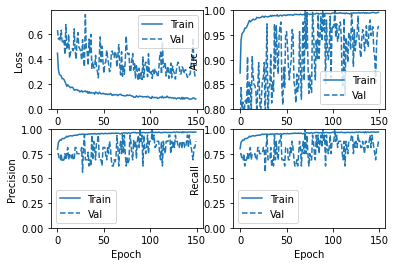

In [10]:
cnn.plot_history()

In [11]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.93      0.85      0.89       234
   PNEUMONIA       0.91      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624

None


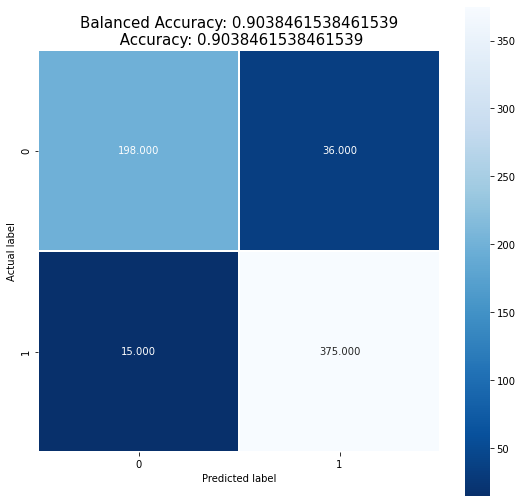

In [12]:
cnn.display_confusion_matrix(test_data_generator = test_set)